# Webscraping with Selnium Glassdoor

## Notebook overview
This notebook details the method of scraping data from Glassdoor UK website to extract the 'Data Scientist' job positions and perform some fundamentory data analysis on it.

This notebook was inspired by Ken Jee's YouTube video: https://www.youtube.com/watch?v=MpF9HENQjDo

## Selenium webscraping library
### Why Selenium?

Selenium is a library that lets you code a python script that would act just like a human user. This allows webscraping from websites to be easier than inspecting html code such as BeautifulSoup.

For more information, visit selenium Tutorial: Scraping Glassdoor.com in 10 Minutes

Source: https://towardsdatascience.com/selenium-tutorial-scraping-glassdoor-com-in-10-minutes-3d0915c6d905

In [ ]:
# Install the required python package library
# pip install selenium

In [254]:
# Import the relevant libraries 

# Data analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Webscraping libraries
from selenium.common.exceptions import NoSuchElementException, ElementClickInterceptedException
from selenium import webdriver
import time

In [255]:
# Function to retrieve data from glassdoor
# Code source from here https://github.com/arapfaik/scraping-glassdoor-selenium

def get_jobs(keyword, num_jobs, verbose, path, slp_time):
    
    '''Gathers jobs as a dataframe, scraped from Glassdoor'''
    
    #Initializing the webdriver
    options = webdriver.ChromeOptions()
    
    #Uncomment the line below if you'd like to scrape without a new Chrome window every time.
    #options.add_argument('headless')
    
    #Change the path to where chromedriver is in your home folder.
    driver = webdriver.Chrome(executable_path=path, options=options)
    driver.set_window_size(1120, 1000)
    

    url = "https://www.glassdoor.co.uk/Job/jobs.htm?sc.generalKeyword=" + keyword + "&sc.locationSeoString=london&locId=2671300&locT=C"
    
    driver.get(url)
    jobs = []

    while len(jobs) < num_jobs:  #If true, should be still looking for new jobs.

        #Let the page load. Change this number based on your internet speed.
        #Or, wait until the webpage is loaded, instead of hardcoding it.
        time.sleep(slp_time)

        #Test for the "Sign Up" prompt and get rid of it.
        try:
            driver.find_element_by_class_name("selected").click()
        except ElementClickInterceptedException:
            pass

        time.sleep(.1)

        try:
            driver.find_element_by_class_name("ModalStyle__xBtn___29PT9").click()  #clicking to the X.
        except NoSuchElementException:
            pass

        # Going through each job in this page
        job_buttons = driver.find_elements_by_class_name("jl")  #jl for Job Listing. These are the buttons we're going to click.
        for job_button in job_buttons:  

            print("Progress: {}".format("" + str(len(jobs)) + "/" + str(num_jobs)))
            if len(jobs) >= num_jobs:
                break

            job_button.click()  #You might 
            time.sleep(1)
            collected_successfully = False
            
            while not collected_successfully:
                try:
                    company_name = driver.find_element_by_xpath('.//div[@class="employerName"]').text
                    location = driver.find_element_by_xpath('.//div[@class="location"]').text
                    job_title = driver.find_element_by_xpath('.//div[contains(@class, "title")]').text
                    job_description = driver.find_element_by_xpath('.//div[@class="jobDescriptionContent desc"]').text
                    collected_successfully = True
                except:
                    time.sleep(5)

            try:
                salary_estimate = job_button.find_element_by_xpath('.//span[@class="gray salary"]').text
            except NoSuchElementException:
                salary_estimate = -1 #You need to set a "not found value. It's important."
            
            try:
                hiring_status = job_button.find_element_by_xpath('.//div[@data-test="urgency-label"]').text
            except NoSuchElementException:
                hiring_status = -1 #You need to set a "not found value. It's important."
                
            try:
                last_active = job_button.find_element_by_xpath('.//div[@data-test="job-age"]').text
            except NoSuchElementException:
                last_active = -1 #You need to set a "not found value. It's important."
                
            try:
                rating = driver.find_element_by_xpath('.//span[@class="rating"]').text
            except NoSuchElementException:
                rating = -1 #You need to set a "not found value. It's important."

            # Printing for debugging
            if verbose:
                print("Job Title: {}".format(job_title))
                print("Salary Estimate: {}".format(salary_estimate))
                print("Job Description: {}".format(job_description[:500]))
                print("Rating: {}".format(rating))
                print("Company Name: {}".format(company_name))
                print("Location: {}".format(location))

            # Going to the Company tab...
            #clicking on this:
            #<div class="tab" data-tab-type="overview"><span>Company</span></div>
            try:
                driver.find_element_by_xpath('.//div[@class="tab" and @data-tab-type="overview"]').click()

                try:
                    #<div class="infoEntity">
                    #    <label>Headquarters</label>
                    #    <span class="value">San Francisco, CA</span>
                    #</div>
                    headquarters = driver.find_element_by_xpath('.//div[@class="infoEntity"]//label[text()="Headquarters"]//following-sibling::*').text
                except NoSuchElementException:
                    headquarters = -1

                try:
                    size = driver.find_element_by_xpath('.//div[@class="infoEntity"]//label[text()="Size"]//following-sibling::*').text
                except NoSuchElementException:
                    size = -1

                try:
                    founded = driver.find_element_by_xpath('.//div[@class="infoEntity"]//label[text()="Founded"]//following-sibling::*').text
                except NoSuchElementException:
                    founded = -1

                try:
                    type_of_ownership = driver.find_element_by_xpath('.//div[@class="infoEntity"]//label[text()="Type"]//following-sibling::*').text
                except NoSuchElementException:
                    type_of_ownership = -1

                try:
                    industry = driver.find_element_by_xpath('.//div[@class="infoEntity"]//label[text()="Industry"]//following-sibling::*').text
                except NoSuchElementException:
                    industry = -1

                try:
                    sector = driver.find_element_by_xpath('.//div[@class="infoEntity"]//label[text()="Sector"]//following-sibling::*').text
                except NoSuchElementException:
                    sector = -1

                try:
                    revenue = driver.find_element_by_xpath('.//div[@class="infoEntity"]//label[text()="Revenue"]//following-sibling::*').text
                except NoSuchElementException:
                    revenue = -1

                try:
                    competitors = driver.find_element_by_xpath('.//div[@class="infoEntity"]//label[text()="Competitors"]//following-sibling::*').text
                except NoSuchElementException:
                    competitors = -1

            except NoSuchElementException:  #Rarely, some job postings do not have the "Company" tab.
                headquarters = -1
                size = -1
                founded = -1
                type_of_ownership = -1
                industry = -1
                sector = -1
                revenue = -1
                competitors = -1
                
            if verbose:
                print("Headquarters: {}".format(headquarters))
                print("Size: {}".format(size))
                print("Founded: {}".format(founded))
                print("Type of Ownership: {}".format(type_of_ownership))
                print("Industry: {}".format(industry))
                print("Sector: {}".format(sector))
                print("Revenue: {}".format(revenue))
                print("Competitors: {}".format(competitors))
                print("@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@")

            jobs.append({"Job Title" : job_title,
            "Salary Estimate" : salary_estimate,
            "Job Description" : job_description,
            "Hiring Status" : hiring_status,
            "Hiring Activity" : last_active,
            "Rating" : rating,
            "Company Name" : company_name,
            "Location" : location,
            "Headquarters" : headquarters,
            "Size" : size,
            "Founded" : founded,
            "Type of ownership" : type_of_ownership,
            "Industry" : industry,
            "Sector" : sector,
            "Revenue" : revenue,
            "Competitors" : competitors})
            #add job to jobs

        #Clicking on the "next page" button
        try:
            driver.find_element_by_xpath('.//li[@class="next"]//a').click()
        except NoSuchElementException:
            print("Scraping terminated before reaching target number of jobs. Needed {}, got {}.".format(num_jobs, len(jobs)))
            break

    return pd.DataFrame(jobs)  #This line converts the dictionary object into a pandas DataFrame.

In [ ]:
# Executing the webscraping function
path = 'chromedriver'
df = get_jobs("data scientist", 330, False, path, 1)

In [ ]:
# Display the scraped data

df

## Saving the dataframe to CSV

In [ ]:
# Save the dataframe to csv

# df.to_csv('glassdoor2.csv', index=False)

## Loading the dataframe to CSV

In [2]:
# Loading the data in from the saved CSV

df = pd.read_csv('glassdoorLondon2.csv')

In [3]:
# Checking the scraped object types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          330 non-null    object 
 1   Salary Estimate    330 non-null    object 
 2   Job Description    330 non-null    object 
 3   Hiring Status      330 non-null    object 
 4   Hiring Activity    330 non-null    object 
 5   Rating             330 non-null    float64
 6   Company Name       325 non-null    object 
 7   Location           330 non-null    object 
 8   Headquarters       330 non-null    object 
 9   Size               330 non-null    object 
 10  Founded            330 non-null    int64  
 11  Type of ownership  330 non-null    object 
 12  Industry           330 non-null    object 
 13  Sector             330 non-null    object 
 14  Revenue            330 non-null    object 
 15  Competitors        330 non-null    object 
dtypes: float64(1), int64(1), o

In [4]:
df.head()

,Job Title,Salary Estimate,Job Description,Hiring Status,Hiring Activity,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Data Scientist,£46K-£52K (Glassdoor Est.),Data Scientist\n\nApply Now\n\nBecome part of ...,HOT,25d,3.3,PA Consulting\n3.3,"London, England","London, United Kingdom",1001 to 5000 employees,1943,Company - Private,Consulting,Business Services,£100 to £500 million (GBP),"McKinsey & Company, Accenture, Deloitte"
1,Software Engineer (Data),-1,About DueDil\n\nDuedil exists to tell the stor...,Actively Hiring,11d,4.5,DueDil\n4.5,"London, England","London, United Kingdom",51 to 200 employees,2011,Company - Private,Enterprise Software & Network Solutions,Information Technology,£1 to £5 million (GBP),-1
2,Senior Data Scientist,£65K-£66K (Glassdoor Est.),Streetbees is building the world's first real-...,Actively Hiring,17d,3.5,Streetbees\n3.5,"London, England","London, United Kingdom",51 to 200 employees,2015,Company - Private,Research & Development,Business Services,Unknown / Non-Applicable,-1
3,Data Scientist,£51K-£66K (Glassdoor Est.),Streetbees is building the world's first real-...,-1,11d,3.5,Streetbees\n3.5,"London, England","London, United Kingdom",51 to 200 employees,2015,Company - Private,Research & Development,Business Services,Unknown / Non-Applicable,-1
4,Data Analyst for the Skills for Prosperity (S4...,£32K-£51K (Glassdoor Est.),Data Analyst for the Skills for Prosperity (S4...,Actively Hiring,7d,3.3,PA Consulting\n3.3,"London, England","London, United Kingdom",1001 to 5000 employees,1943,Company - Private,Consulting,Business Services,£100 to £500 million (GBP),"McKinsey & Company, Accenture, Deloitte"


In [5]:
df.shape

(330, 16)

# Things that need cleaning

* Salary Estimate - dollar sign, K, glassdoor estimate
* Hiring activity - need to remove d
* Rating - Need to convert to float
* Size - range of employees to number
* Founded - Need to convert to date
* Revenue

In [6]:
df['Salary Estimate'].head(10)

0    £46K-£52K (Glassdoor Est.)
1                            -1
2    £65K-£66K (Glassdoor Est.)
3    £51K-£66K (Glassdoor Est.)
4    £32K-£51K (Glassdoor Est.)
5    £45K-£74K (Glassdoor Est.)
6    £45K-£74K (Glassdoor Est.)
7                            -1
8    £50K-£70K (Glassdoor Est.)
9    £61K-£92K (Glassdoor Est.)
Name: Salary Estimate, dtype: object

In [216]:
# Splitting word and returning the first element in the list

# Testing it out

word = '£46K-£52K (Glassdoor Est.)'
print(word.split(' (')[0])

£46K-£52K


In [217]:
# Salary parsing

df = df[df['Salary Estimate'] != '-1'] # filter out -1 values from the column 
salary = df['Salary Estimate'].apply(lambda x: x.split(' (')[0]) # Split the salary estimate entry by ( parenthesis and return the first value in the list
minus_KP = salary.apply(lambda x: x.replace('K', '').replace('£', '')) # Replace values with blank space
df['Min_Salary'] = minus_KP.apply(lambda x: int(x.split('-')[0]))
df['Max_Salary'] = minus_KP.apply(lambda x: int(x.split('-')[1]))
df['Avg_Salary'] = (df.Min_Salary+df.Max_Salary)/2

In [230]:
# Hiring activity

df['Hiring_Act'] = df.apply(lambda x: x['Hiring Activity'][:-1], axis = 1) # Gets rid of the d letter
df['Hiring_Act'] = df['Hiring_Act'].apply(lambda x: x.replace('d','')) # Remove the d in 30d+

In [231]:
# Company name text only
# Company name has rating associated with text
# Some company names don't have a rating, which can directly be used again

df['Company_txt'] = df.apply(lambda x: x['Company Name'] if x['Rating'] <0 else x['Company Name'][:-4], axis = 1)

In [232]:
# Location to just UK

df['Location UK'] = df['Location'].apply(lambda x: x.split(',')[0])

In [235]:
# Size of company

size = df['Size'].apply(lambda x: x.replace('employees', '').replace('+',''))
#size.unique()
max_size = size.apply(lambda x: x if len(x) <= 7 else x.split('to')[1])
max_size = max_size.replace('Unknown', '0')
max_size = max_size.replace(' ', '')
max_size = pd.to_numeric(max_size)
df['max_size'] = max_size

In [236]:
# Age of company

df['Age'] = df.Founded.apply(lambda x: x if x <1 else 2020 - x) 

In [237]:
# Parsing of job description (python, etc..)

# Python
df['python_req'] = df['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)

# # R studio
# df['R_req'] = df['Job Description'].apply(lambda x: 1 if 'r studio' in x.lower() or 'r-studio' in x.lower() else 0)
# df.R_req.value_counts()

# Spark
df['spark_req'] = df['Job Description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)
df.spark_req.value_counts()

# SQL
df['SQL_req'] = df['Job Description'].apply(lambda x: 1 if 'SQL' in x.upper() else 0)
df.SQL_req.value_counts()

# Tableau
df['tableau_req'] = df['Job Description'].apply(lambda x: 1 if 'tableau' in x.lower() else 0)
df.tableau_req.value_counts()

# Excel
df['excel_req'] = df['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)
df.excel_req.value_counts()

# Excel
df['hadoop_req'] = df['Job Description'].apply(lambda x: 1 if 'hadoop' in x.lower() else 0)
df.hadoop_req.value_counts()

0    85
1    24
Name: hadoop_req, dtype: int64

In [239]:
# Function to retrieve common job titles

def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    else:
        return 'NA'
    
# Function to retrieve title seniority of position

def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr.' in title.lower() or 'lead' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'junior' in title.lower() or 'jr.' in title.lower():
        return 'junior'
    else:
        return 'NA'

In [240]:
# Retrieve simplified job titles 

df['job_simp'] = df['Job Title'].apply(title_simplifier)
df.job_simp.value_counts()

data scientist    65
NA                22
analyst            9
data engineer      8
mle                5
Name: job_simp, dtype: int64

In [241]:
# Retrieve seniority of job title

df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

NA        83
senior    24
junior     2
Name: seniority, dtype: int64

In [238]:
# Dropping columns not needed

to_drop = ['Salary Estimate', 'Hiring Activity', 'Company Name', 'Location', 'Size']

df.columns
df.drop(to_drop, axis=1, inplace=True)

In [242]:
df.shape

(109, 27)

In [243]:
pd.options.display.max_rows = 80
pd.options.display.max_columns = 80
df

,Job Title,Job Description,Hiring Status,Rating,Headquarters,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Min_Salary,Max_Salary,Avg_Salary,Hiring_Act,Company_txt,Location UK,max_size,Age,python_req,spark_req,SQL_req,tableau_req,excel_req,hadoop_req,job_simp,seniority
0,Data Scientist,Data Scientist\n\nApply Now\n\nBecome part of ...,HOT,3.3,"London, United Kingdom",1943,Company - Private,Consulting,Business Services,£100 to £500 million (GBP),"McKinsey & Company, Accenture, Deloitte",46,52,49.0,25,PA Consulting,London,5000,77,0,0,0,0,0,0,data scientist,NA
2,Senior Data Scientist,Streetbees is building the world's first real-...,Actively Hiring,3.5,"London, United Kingdom",2015,Company - Private,Research & Development,Business Services,Unknown / Non-Applicable,-1,65,66,65.5,17,Streetbees,London,200,5,1,0,0,0,0,0,data scientist,senior
3,Data Scientist,Streetbees is building the world's first real-...,-1,3.5,"London, United Kingdom",2015,Company - Private,Research & Development,Business Services,Unknown / Non-Applicable,-1,51,66,58.5,11,Streetbees,London,200,5,1,0,0,0,0,0,data scientist,NA
4,Data Analyst for the Skills for Prosperity (S4...,Data Analyst for the Skills for Prosperity (S4...,Actively Hiring,3.3,"London, United Kingdom",1943,Company - Private,Consulting,Business Services,£100 to £500 million (GBP),"McKinsey & Company, Accenture, Deloitte",32,51,41.5,7,PA Consulting,London,5000,77,0,0,0,0,1,0,analyst,NA
5,Sports Data Scientist,Apply for this job\n\nDescription\n\n\nSports ...,HOT,4.2,"Sofia, Bulgaria",2007,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,-1,45,74,59.5,4,SBTech,London,5000,13,1,0,0,0,1,0,data scientist,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,Marketing Data Analytics Lead,Join one of Europe’s leading Fintech startups\...,-1,4.6,"London, United Kingdom",2012,Company - Private,Lending,Finance,£50 to £100 million (GBP),-1,35,66,50.5,5,iwoca,London,500,8,1,0,0,0,0,0,NA,senior
309,Senior Data Engineer,"Who are we?\n\nWelcome to Tractable, we're an ...",Hiring Surge,4.7,"London, United Kingdom",2014,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,-1,65,83,74.0,23,Tractable,London,200,6,1,1,1,0,1,1,data engineer,senior
315,Biology Principal Scientist / Associate Director,Job Specification\n\nPharmaron is a premier R&...,HOT,2.4,"Beijing, China",2003,Company - Private,-1,-1,Unknown / Non-Applicable,-1,37,53,45.0,5,Pharmaron,Hoddesdon,5000,17,0,0,0,0,0,0,NA,NA
318,Management Consultant – Data Science,"Seize the emerging possibilities of Analytics,...",Top Company,4.2,"Paris, France",1967,Company - Public,Enterprise Software & Network Solutions,Information Technology,£5 to £10 billion (GBP),"Accenture, CGI, Sopra Steria",84,104,94.0,24,Capgemini,London,10000,53,1,0,1,1,0,0,NA,NA


# Exploratory Data Analysis

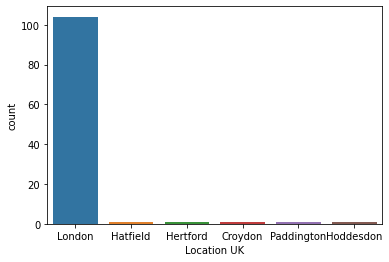

In [245]:
# Location distribution of jobs

sns.countplot(df['Location UK'])

## Numerical features

In [247]:
# Convert to numerical from object type

df['Hiring_Act'] = pd.to_numeric(df['Hiring_Act'])

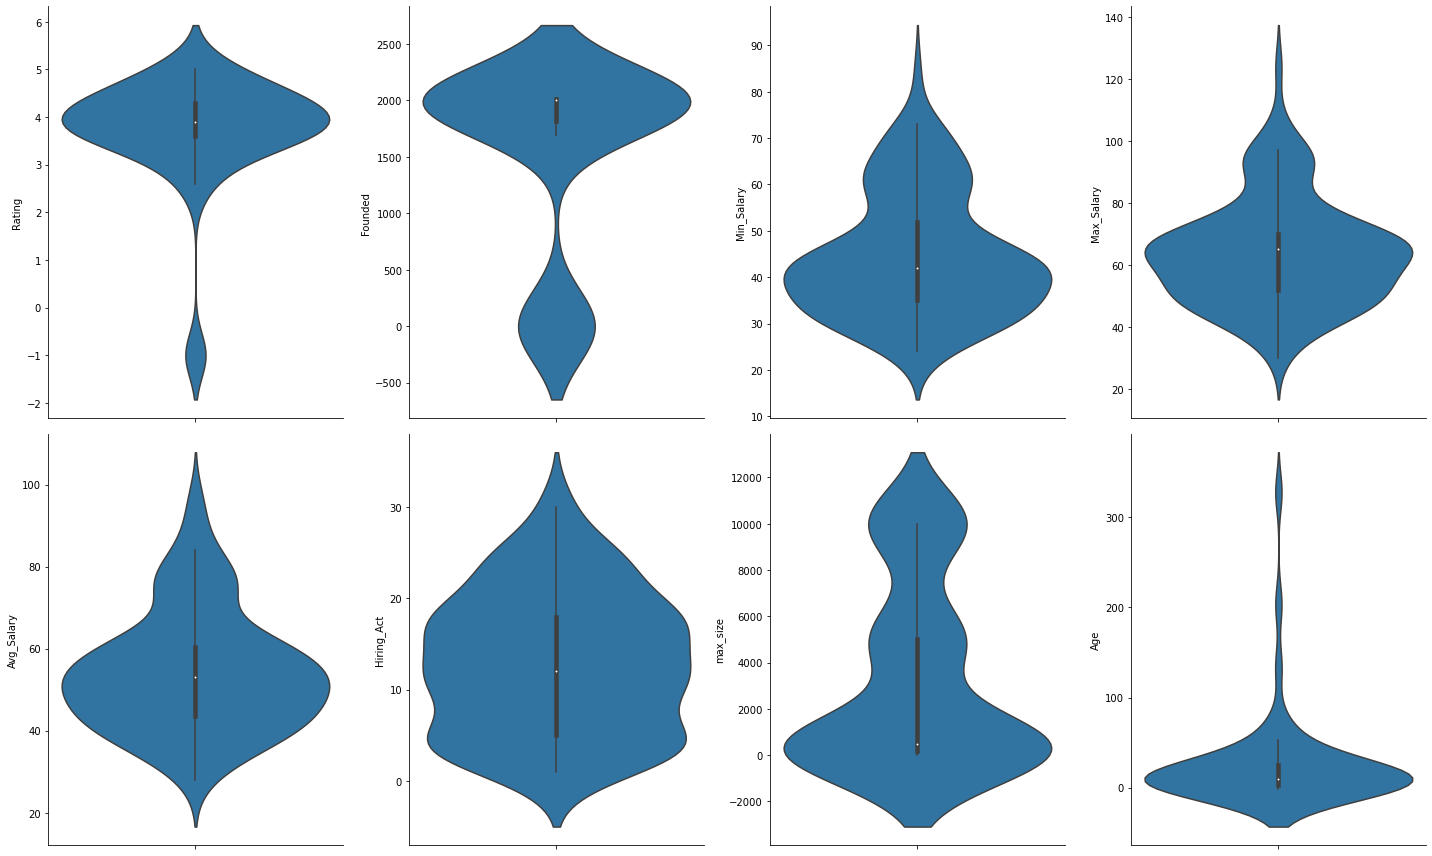

In [248]:
# Violin plots shows the probabillity density of the data at different values

cols = ['Rating', 'Founded', 'Min_Salary', 'Max_Salary', 'Avg_Salary', 'Hiring_Act', 'max_size', 'Age']

plt.figure(figsize=[20,12])

index = 1

for col in cols :
    plt.subplot(2,4,index)
    sns.violinplot(data=df, x=df[col], orient='v')
    sns.despine()
    index += 1
    
plt.tight_layout()
plt.show()

In [252]:
pd.options.display.max_rows = 3
pd.options.display.max_columns = 999
df

,Job Title,Job Description,Hiring Status,Rating,Headquarters,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Min_Salary,Max_Salary,Avg_Salary,Hiring_Act,Company_txt,Location UK,max_size,Age,python_req,spark_req,SQL_req,tableau_req,excel_req,hadoop_req,job_simp,seniority
0,Data Scientist,Data Scientist\n\nApply Now\n\nBecome part of ...,HOT,3.3,"London, United Kingdom",1943,Company - Private,Consulting,Business Services,£100 to £500 million (GBP),"McKinsey & Company, Accenture, Deloitte",46,52,49.0,25,PA Consulting,London,5000,77,0,0,0,0,0,0,data scientist,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,Consultant Clinical Scientist or Clinical Scie...,About The Facility\n\nHCA Healthcare UK – The ...,HOT,2.8,"London, United Kingdom",1968,Hospital,Healthcare Services & Hospitals,Healthcare,£100 to £500 million (GBP),-1,31,47,39.0,17,HCA Healthcare UK,London,5000,52,0,0,0,0,1,0,NA,NA


## Categorical features

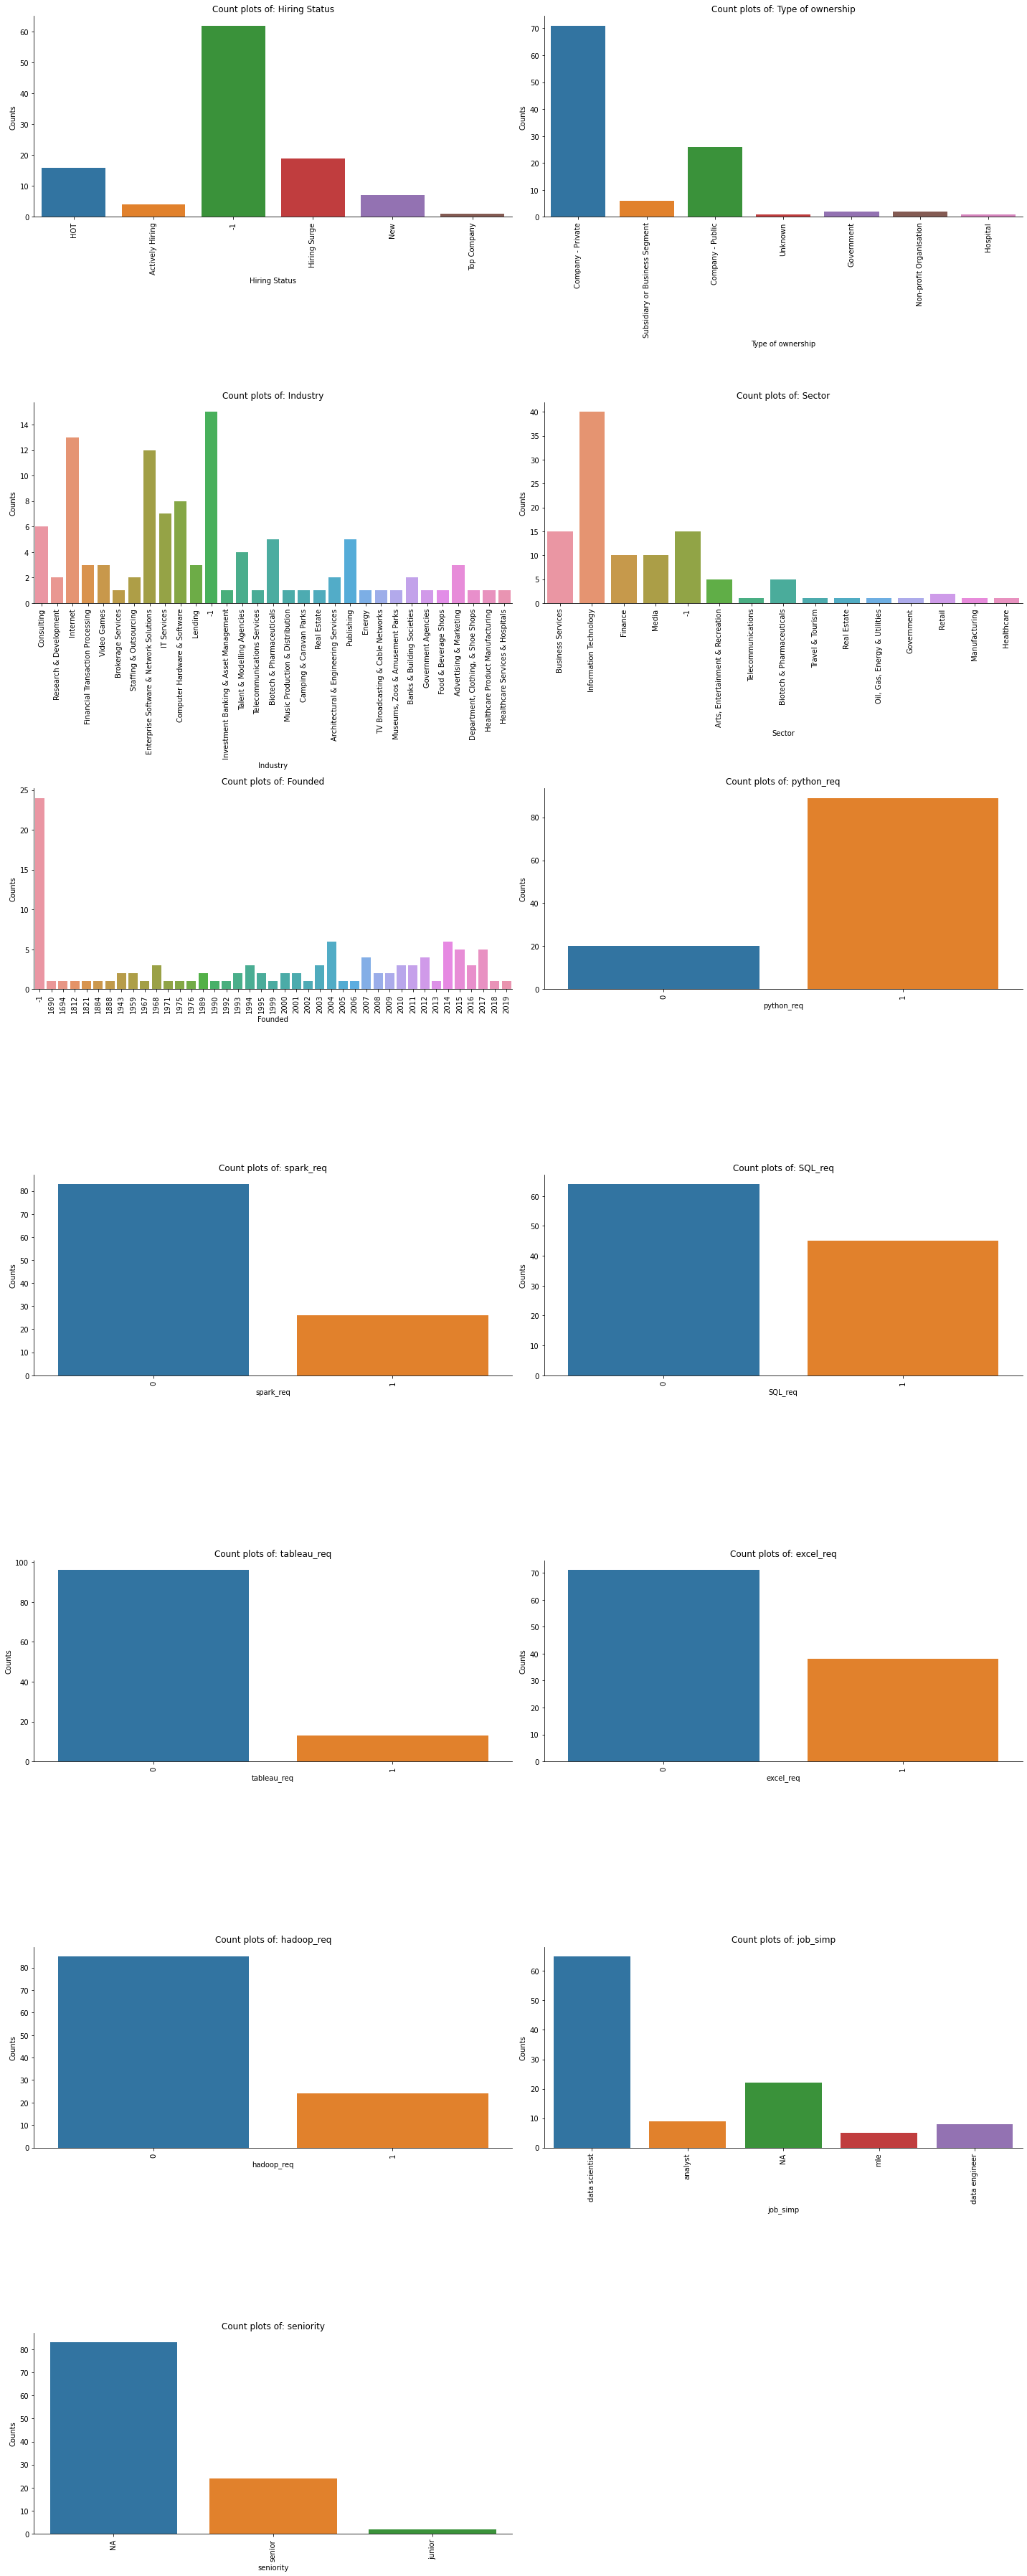

In [253]:
cols = ['Hiring Status', 'Type of ownership', 'Industry', 'Sector', 'Founded', 'python_req', 'spark_req', 'SQL_req', 'tableau_req', 'excel_req', 'hadoop_req', 'job_simp', 'seniority']

plt.figure(figsize=[20,50])

counter = 0
index = 1
rows = 7
columns = 2

for col in cols:
    plt.subplot(rows,columns,index)
    sns.countplot(df[col])
    sns.despine()
    plt.title('Count plots of: ' + col)
    plt.ylabel('Counts')
    plt.xticks(rotation=90)
    index += 1
    counter += 1
    
plt.tight_layout()
plt.show()

## Number of jobs available with titles

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65]),
 <a list of 66 Text major ticklabel objects>)

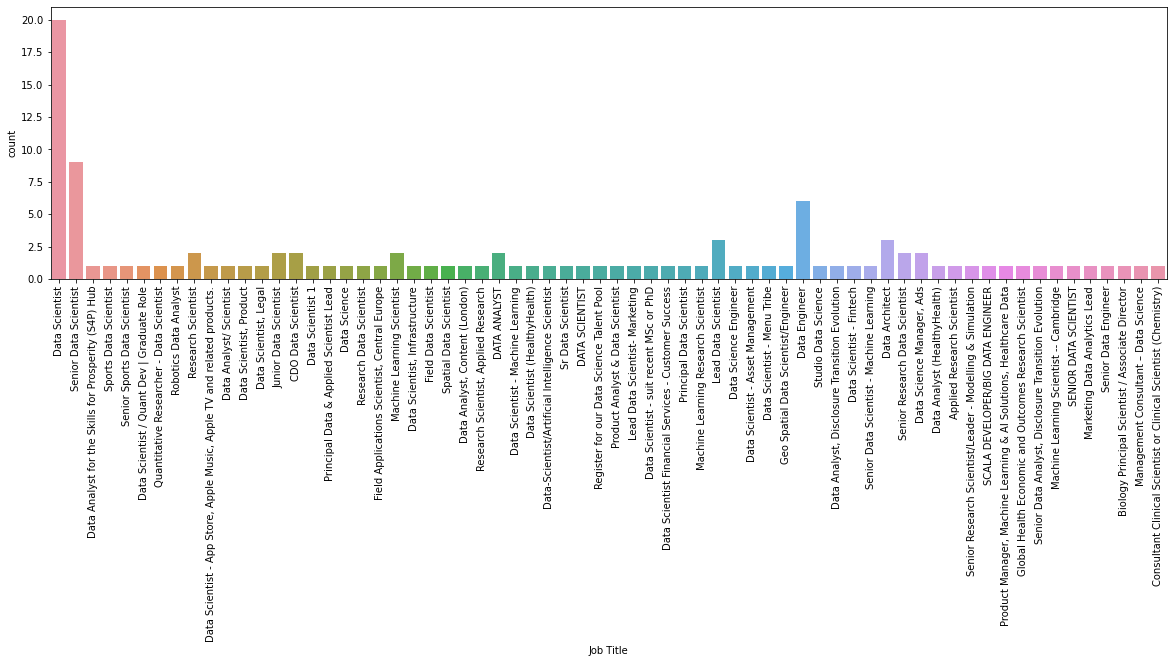

In [194]:
plt.figure(figsize = (20,5))
sns.countplot(df['Job Title'])
plt.xticks(rotation=90)

## Average Salary

In [177]:
avg_salary = df.groupby(['Company_txt'])['Avg_Salary'].mean().reset_index()
avg_salary = avg_salary.sort_values(by=['Avg_Salary'], ascending=False)

mean_salary = avg_salary['Avg_Salary'].mean()
mean_salary

53.06425702811244

Text(50, 60, 'Mean salary across all job positions, £53.06K')

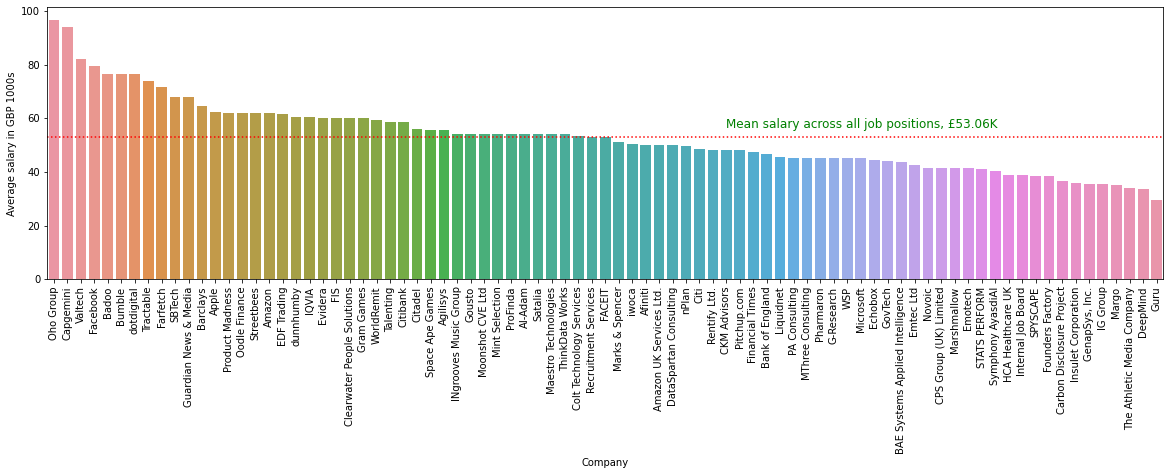

In [196]:
# Plotting average salary against company

plt.figure(figsize = (20,5))
sns.barplot(data=avg_salary, x=avg_salary['Company_txt'], y=avg_salary['Avg_Salary'])
plt.xticks(rotation=90)
plt.axhline(y=mean_salary, color='r', linestyle='dotted')
plt.ylabel('Average salary in GBP 1000s')
plt.xlabel('Company')

plt.text(50, 60, 'Mean salary across all job positions, £53.06K', fontsize=12, color='green',
         ha='left' ,va='top')

## Salary comparison with company size

In [190]:
size_salary = df.groupby(['max_size'])['Avg_Salary'].mean().reset_index()
size_salary = size_salary.sort_values(by=['max_size'], ascending=False)
size_salary

,max_size,Avg_Salary
6,10000,63.108696
5,5000,54.704545
4,1000,50.722222
3,500,50.833333
2,200,50.000000
1,50,52.173913
0,0,47.750000


Text(0.5, 0, 'Company size')

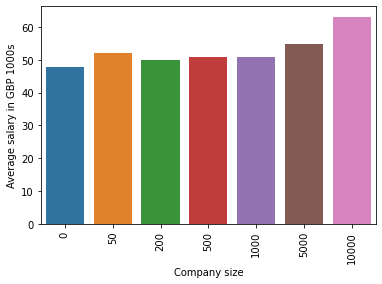

In [191]:
# Plotting average salary against company size

sns.barplot(data=size_salary, x=size_salary['max_size'], y=size_salary['Avg_Salary'])
plt.xticks(rotation=90)
plt.ylabel('Average salary in GBP 1000s')
plt.xlabel('Company size')

## Job requirements

In [166]:
# Requirements

df['python_req'].value_counts()

1    89
0    20
Name: python_req, dtype: int64

In [167]:
df['spark_req'].value_counts()

0    83
1    26
Name: spark_req, dtype: int64

In [168]:
df['SQL_req'].value_counts()

0    64
1    45
Name: SQL_req, dtype: int64

In [169]:
df['tableau_req'].value_counts()

0    96
1    13
Name: tableau_req, dtype: int64

In [170]:
df['excel_req'].value_counts()

0    71
1    38
Name: excel_req, dtype: int64

In [171]:
df['hadoop_req'].value_counts()

0    85
1    24
Name: hadoop_req, dtype: int64

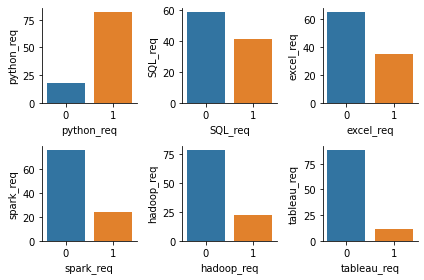

In [172]:
cols = ['python_req', 'SQL_req', 'excel_req', 'spark_req', 'hadoop_req', 'tableau_req']

index = 1

for col in cols:
    plt.subplot(2,3,index)
    percentage = lambda x: len(x) / float(len(df[col])) * 100
    sns.barplot(x=df[col], y=df[col],  estimator=percentage)
    sns.despine()  
    index += 1
    
plt.tight_layout()
plt.show()

# To do: next steps

* Deal with null values in the original dataset so more information can be obtained
    * Replace null values with measures of central tendency (mean, median, mode) or replace it with a new category (eg. ‘None’)
    * Predict the null values based on other variables. E.g. if a row has a null value for weight, but it has a value for height, you can replace the null value with the average weight for that given height
* Predict salary from features of job listing